In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/sandp500/all_stocks_5yr.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/sandp500/all_stocks_5yr.csv")
print(data.head(2))

         date   open   high    low  close   volume Name
0  2013-02-08  15.07  15.12  14.63  14.75  8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46  8882000  AAL


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
open,619029.0,8.302333e+01,9.737877e+01,1.62,40.220,62.59,94.37,2.044000e+03
high,619032.0,8.377831e+01,9.820752e+01,1.69,40.620,63.15,95.18,2.067990e+03
low,619032.0,8.225610e+01,9.650742e+01,1.50,39.830,62.02,93.54,2.035110e+03
close,619040.0,8.304376e+01,9.738975e+01,1.59,40.245,62.62,94.41,2.049000e+03
volume,619040.0,4.321823e+06,8.693610e+06,0.00,1070320.500,2082093.50,4284509.25,6.182376e+08


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
# Check for missing values
print(data.isnull().sum())

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64


In [6]:
# Fill missing values in numerical columns with the mean
data['open'].fillna(data['open'].mean(), inplace=True)
data['high'].fillna(data['high'].mean(), inplace=True)
data['low'].fillna(data['low'].mean(), inplace=True)

# Check if missing values have been handled
print(data.isnull().sum())

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [7]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)

# Sort the data based on the index (date)
data.sort_index(inplace=True)

# Display the updated dataset
print(data.head())

              open      high      low   close   volume Name
date                                                       
2013-02-08   15.07   15.1200   14.630   14.75  8407500  AAL
2013-02-08   81.22   81.9300   80.940   81.89   296853  SLG
2013-02-08   78.24   79.0700   78.125   79.07  4632684  SLB
2013-02-08  236.64  238.6924  235.750  238.16   552207  BLK
2013-02-08   89.04   89.4800   88.910   89.16   554948  SJM


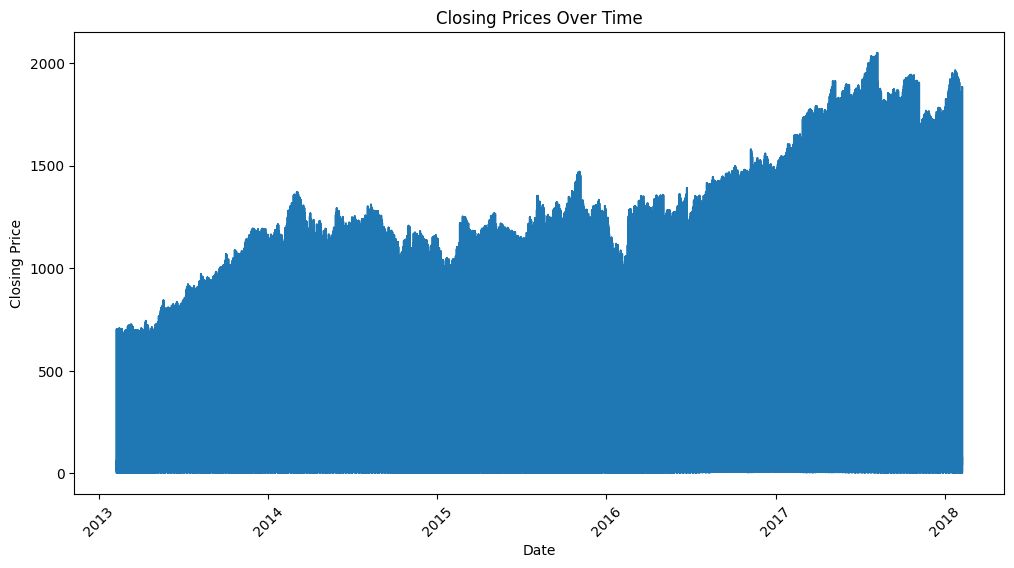

In [8]:
data.index = pd.to_datetime(data.index)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'])
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()


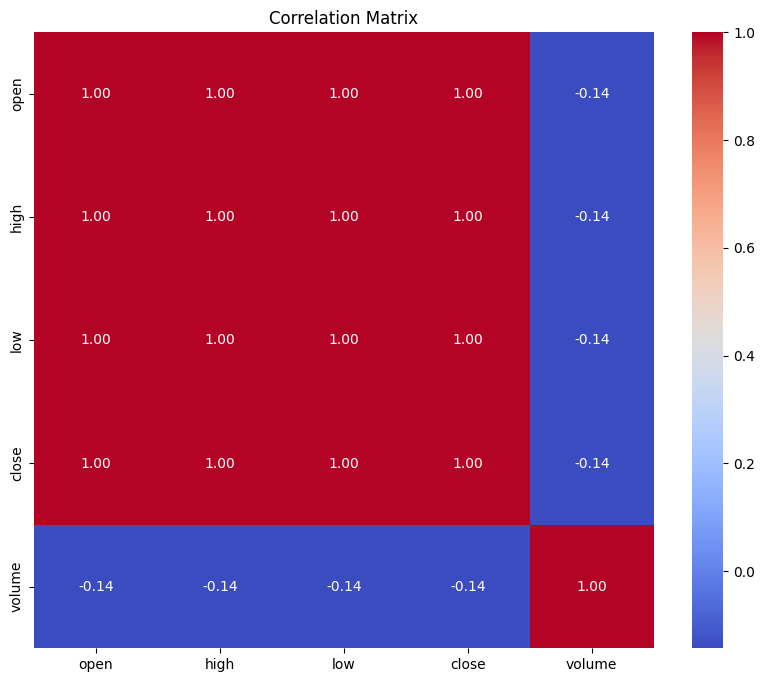

In [9]:
# Calculating correlations between different stocks (excluding my categorical column)
correlation_matrix = data.drop(columns=['Name']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  Explore Stationarity

Stationarity in the context of time series data essentially means that the statistical properties of the data don't change over time. This includes properties like the mean (average) and variance (spread) of the data.

A stationary time series is one where:

* **Mean**: If the mean of the series fluctuates or changes over time, it suggests that there is a trend in the data, which makes it non-stationary.
* **Variance**: If the variance of the series changes over time, it indicates that the spread of data points is not constant, which also makes it non-stationary.
* **Covariance**: Covariance is a measure of how two variables change together. In a stationary time series, the covariance between two time points depends only on the time lag between them, not on absolute time.

So, when we say we're checking for stationarity, we're essentially looking to see if the mean, variance, and covariance of the time series data remain constant over time.

In practical terms, one common way to check for stationarity is to observe the behavior of the data visually. We can plot the data and see if it exhibits any clear trends or patterns over time. If it does, it's likely non-stationary.

Another approach is using statistical tests like the Augmented Dickey-Fuller (ADF) test, which quantitatively evaluates whether a time series is stationary or not based on its statistical properties.

**Method 1: Visual Inspection**

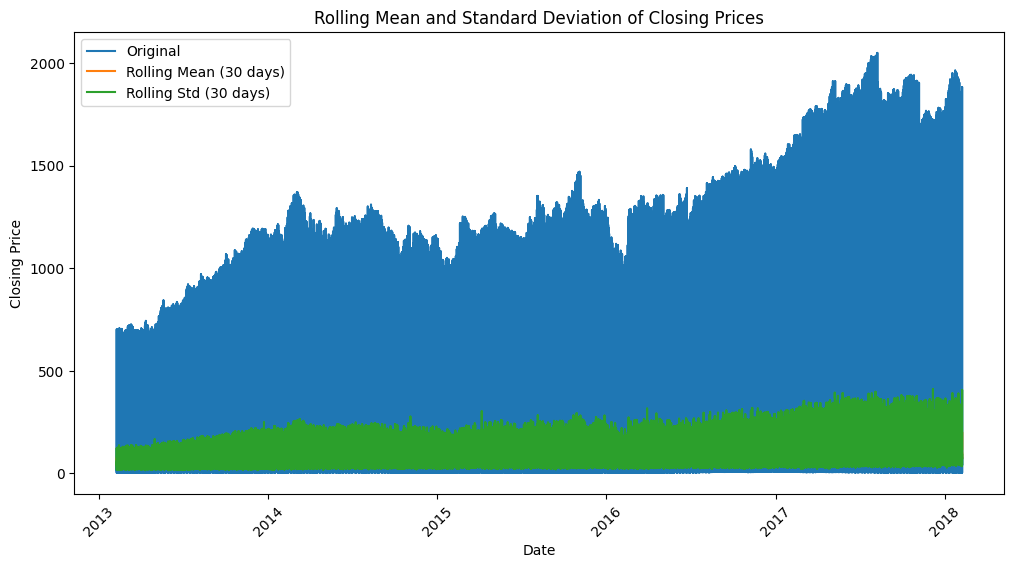

In [10]:
# Calculate rolling statistics
rolling_mean = data['close'].rolling(window=30).mean()
rolling_std = data['close'].rolling(window=30).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (30 days)')
plt.plot(rolling_std, label='Rolling Std (30 days)')
plt.title('Rolling Mean and Standard Deviation of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Method 2: Statistical Test (ADF Test)**

In [11]:
from statsmodels.tsa.stattools import adfuller

# Function to perform ADF test and print results
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
        
# Select a subset of the data (first 1000 data points)
subset_data = data['close'].iloc[:1000]

# Perform ADF test on the subset
print("ADF Test Results for Subset of Closing Prices:")
adf_test(subset_data)

ADF Test Results for Subset of Closing Prices:
ADF Statistic: -31.64894644207611
p-value: 0.0
Critical Values:
	1%: -3.4369127451400474
	5%: -2.864437475834273
	10%: -2.568312754566378


Since the p-value (0.0) is less than the significance level (e.g., 0.05), we reject the null hypothesis. This indicates that the series is stationary. Additionally, the ADF statistic is significantly lower than the critical values at all confidence levels, further supporting the stationarity of the series.

Therefore, based on the ADF test results, we can conclude that the subset of closing prices exhibits stationarity.